In [1]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [2]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# dataset info

In [3]:
bc.target.shape

(569,)

In [10]:
bc.target[0]

np.int64(0)

In [11]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [12]:
bc.data.shape

(569, 30)

# preprocessing

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [18]:
print(f"features=> train: {x_train.shape} - test: {x_test.shape}")
print(f"label=> train: {y_train.shape} - test: {y_test.shape}")

features=> train: (455, 30) - test: (114, 30)
label=> train: (455,) - test: (114,)


In [19]:
x_train[0]

array([1.299e+01, 1.423e+01, 8.408e+01, 5.143e+02, 9.462e-02, 9.965e-02,
       3.738e-02, 2.098e-02, 1.652e-01, 7.238e-02, 1.814e-01, 6.412e-01,
       9.219e-01, 1.441e+01, 5.231e-03, 2.305e-02, 3.113e-02, 7.315e-03,
       1.639e-02, 5.701e-03, 1.372e+01, 1.691e+01, 8.738e+01, 5.760e+02,
       1.142e-01, 1.975e-01, 1.450e-01, 5.850e-02, 2.432e-01, 1.009e-01])

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
x_train[0]

array([0.28439585, 0.18755187, 0.27841891, 0.15728526, 0.37907376,
       0.24621189, 0.08758201, 0.10427435, 0.2989899 , 0.47219882,
       0.02531233, 0.06210219, 0.00776987, 0.01420999, 0.16274229,
       0.15620212, 0.07861111, 0.13856791, 0.09870193, 0.1660448 ,
       0.20597652, 0.13033049, 0.18412272, 0.09604797, 0.2841577 ,
       0.16513859, 0.1158147 , 0.20103093, 0.17074132, 0.3000197 ])

# classification

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    p = precision_score(y_test, y_pred_test)
    r = recall_score(y_test, y_pred_test)
    print(f"acc train: {acc_train}, acc test: {acc_test}, precision: {p}, recall: {r}")

    return acc_train, acc_test, p, r

## 1. Naive bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [25]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9362637362637363, acc test: 0.956140350877193, precision: 0.9411764705882353, recall: 0.9846153846153847


## 2. KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [27]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9758241758241758, acc test: 0.9824561403508771, precision: 0.9701492537313433, recall: 1.0


## 3. Decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=128, min_samples_split=4, criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=128, min_samples_split=4)

In [31]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0, acc test: 0.9385964912280702, precision: 0.9264705882352942, recall: 0.9692307692307692


## 4. Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [33]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9956043956043956, acc test: 0.956140350877193, precision: 0.9285714285714286, recall: 1.0


## 5. SVM

In [38]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [39]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9824175824175824, acc test: 0.9824561403508771, precision: 0.9701492537313433, recall: 1.0


## 6. Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [42]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9714285714285714, acc test: 0.9649122807017544, precision: 0.9420289855072463, recall: 1.0


## 7. ANN

In [71]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=256, activation='tanh', solver='lbfgs')
ann.fit(x_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=256, solver='lbfgs')

In [72]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0, acc test: 0.9649122807017544, precision: 0.9420289855072463, recall: 1.0


# Comparison

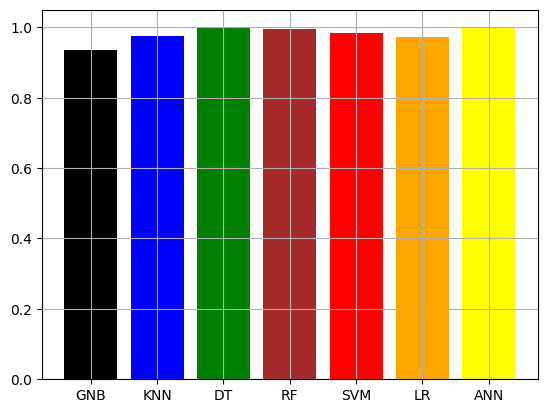

In [74]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'blue', 'green', 'brown', 'red', 'orange', 'yellow']

plt.bar(title, acc_train, color= colors)
plt.grid()
plt.show()


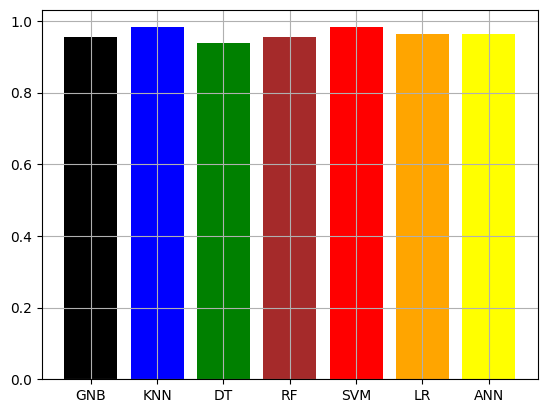

In [75]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'blue', 'green', 'brown', 'red', 'orange', 'yellow']

plt.bar(title, acc_test, color= colors)
plt.grid()
plt.show()


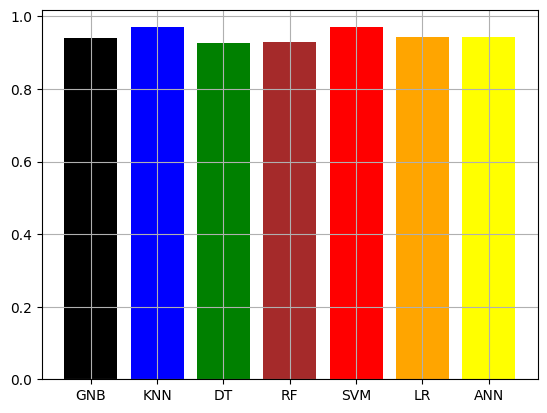

In [76]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'blue', 'green', 'brown', 'red', 'orange', 'yellow']

plt.bar(title, p, color= colors)
plt.grid()
plt.show()

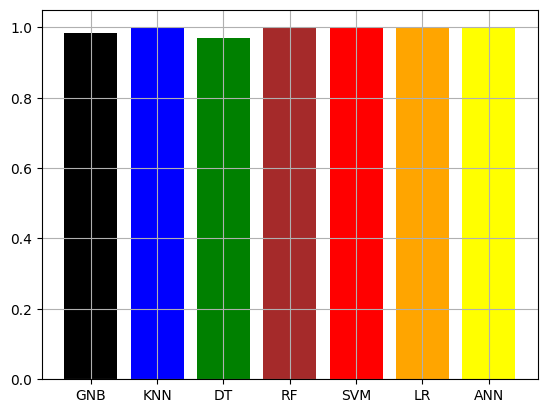

In [77]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'blue', 'green', 'brown', 'red', 'orange', 'yellow']

plt.bar(title, r, color= colors)
plt.grid()
plt.show()